features=32,grid=10,depth=2 class=<class '__main__.MLP'>,time=0.13974523544311523,time_per_step=0.0013974523544311524
features=64,grid=10,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.12086844444274902,time_per_step=0.0012086844444274903
features=64,grid=10,depth=2 class=<class '__main__.MLP'>,time=0.05865812301635742,time_per_step=0.0005865812301635743
features=128,grid=10,depth=2 class=<class 'better_kan.KAN.KAN'>,time=0.11408758163452148,time_per_step=0.001140875816345215
features=128,grid=10,depth=2 class=<class '__main__.MLP'>,time=0.08182168006896973,time_per_step=0.0008182168006896972
features=32,grid=10,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.18170666694641113,time_per_step=0.0018170666694641113
features=32,grid=10,depth=3 class=<class '__main__.MLP'>,time=0.09149885177612305,time_per_step=0.0009149885177612304
features=64,grid=10,depth=3 class=<class 'better_kan.KAN.KAN'>,time=0.16361403465270996,time_per_step=0.0016361403465270997
features=64,grid=10,depth=3 cla

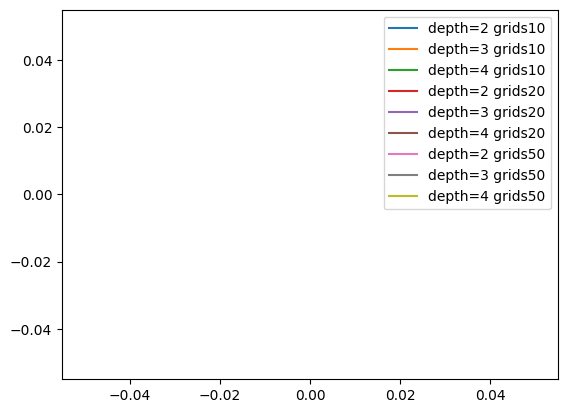

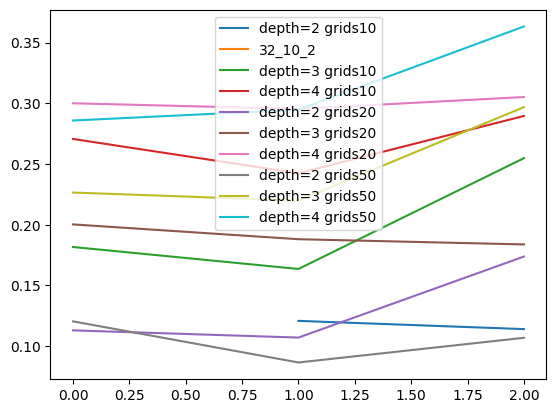

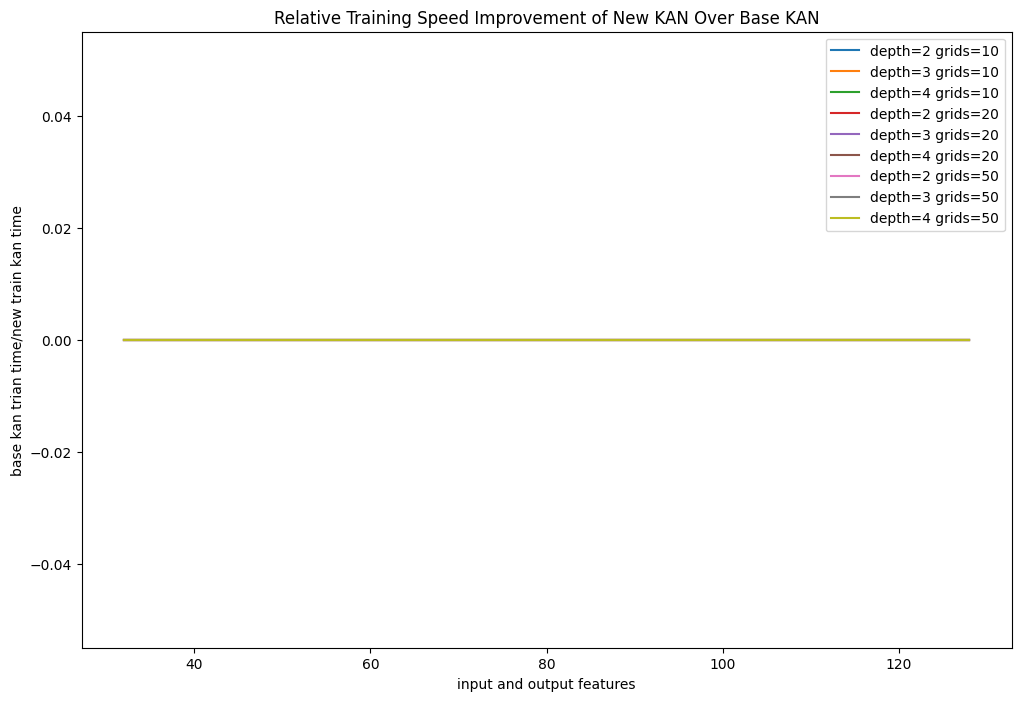

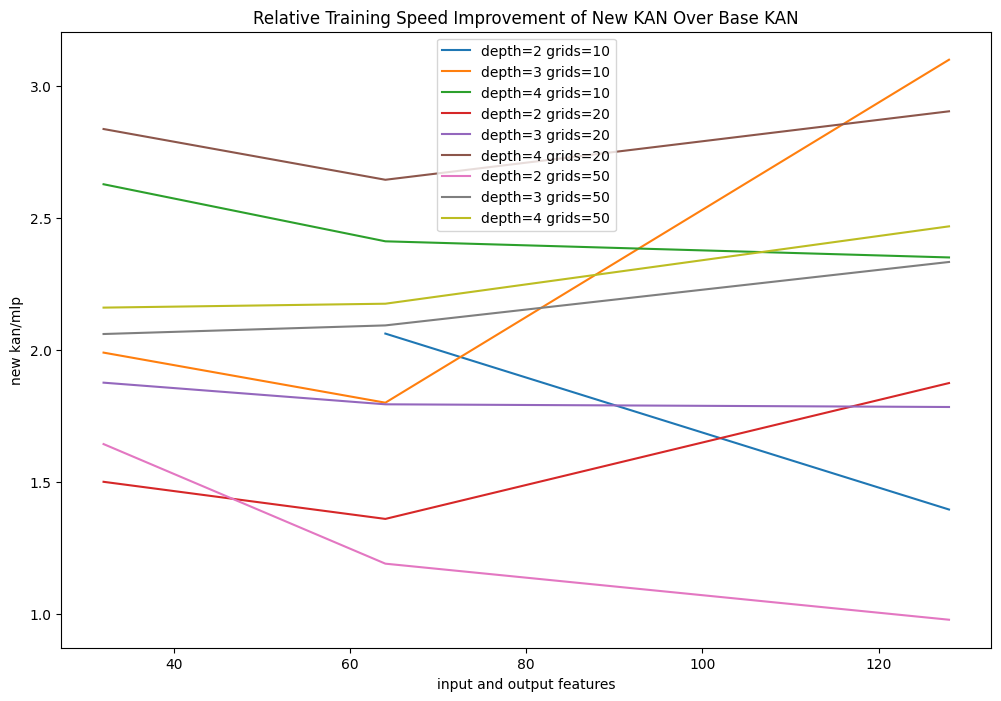

In [1]:
from kan import KAN as BaseKAN
from kan import  create_dataset
from torch import nn
from better_kan import KAN as BetterKAN
import torch
class MLP(torch.nn.Module):
    def __init__(self, in_features, out_features, hidden_dim=128, num_layers=3, activation=torch.nn.SiLU(),seed=0):
        torch.manual_seed(seed)
       
        super(MLP, self).__init__()
        self.layers = nn.Sequential()
        self.layers.append(nn.Linear(in_features, hidden_dim))
        self.layers.append(activation)
        for _ in range(num_layers - 2):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
            self.layers.append(activation)
        self.layers.append(nn.Linear(hidden_dim, out_features))
    def forward(self, x):
        return self.layers(x)
    
import torch
import time
device='cuda' if torch.cuda.is_available() else 'cpu'
n=10
steps=100
base_kan_time=dict()
better_kan_time=dict()
time_scales=dict()
time_scales2=dict()

depths=[2,3,4]
features_list=[32,64,128]
for grid in [10,20,50]:
    
   
    
    for depth in depths:
        base_kan_t=[]
        base_kan_time[f"depth={depth} grids{grid}"]=base_kan_t
        better_kan_t=[]
        better_kan_time[f"depth={depth} grids{grid}"]=better_kan_t
        time_scale=[]
        time_scales[f"depth={depth} grids={grid}"]=time_scale
        time_scale2=[]
        time_scales2[f"depth={depth} grids={grid}"]=time_scale2
        for features in features_list:
            
            dataset=create_dataset(f=lambda x:x,n_var=features,train_num=n,test_num=n,device=device)
        # for kan in [BaseKAN, BetterKAN]:
           
            # try :
            #     t=time.time()
            #     base_kan=BaseKAN(width=[features]*depth,grid=grid,device=device,symbolic_enabled=False)
            #     base_kan.train(dataset,opt="Adam",steps=steps,device=device,update_grid=False)
            #     base_time=time.time()-t
            #     base_kan_t.append(time.time()-t)
            #     print(f"features={features},grid={grid},depth={depth} class={BaseKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
                
            # except Exception as e:
            #     print(f"features={features},grid={grid},depth={depth} class={BaseKAN},error={e}")
            #     base_kan_t.append(float('nan'))
            #     base_time=float('nan')
                
            try:
                    
                t=time.time()
                better_kan=BetterKAN(width=[features]*depth,num_basis=grid,device=device,symbolic_enabled=False,save_acts=False).to(device)
                for _ in range(steps):
                    optimizer.zero_grad()
                    output = better_kan(dataset["train_input"])
                    loss = criterion(output, dataset["train_label"])
                    loss.backward()
                    optimizer.step()
                better_time=time.time()-t
                better_kan_t.append(time.time()-t)
                print(f"features={features},grid={grid},depth={depth} class={BetterKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
               
            except Exception as e:
                better_kan_time[f"{features}_{grid}_{depth}"]=float('nan')
                better_kan_t.append(float('nan'))
                better_time=float('nan')
            # print(f"features={features},grid={grid},depth={depth} time scale={base_time/better_time}")
            # time_scale.append(base_time/better_time)
            time_scale.append(0)
            
          
            try:
                t=time.time()
                mlp=MLP(features,features,features,depth).to(device)
                criterion = torch.nn.MSELoss()
                optimizer = torch.optim.Adam(mlp.parameters())
                for _ in range(steps):
                    optimizer.zero_grad()
                    output = mlp(dataset["train_input"])
                    loss = criterion(output, dataset["train_label"])
                    loss.backward()
                    optimizer.step()
                mpl_time=time.time()-t
                print(f"features={features},grid={grid},depth={depth} class={MLP},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
            except Exception as e:
                mlp_time=float('nan')
                print(f"features={features},grid={grid},depth={depth} class={MLP}",e)
            time_scale2.append(better_time/mpl_time)
import matplotlib.pyplot as plt 
# plt.figure()
plt.figure()
for k,v in base_kan_time.items():
    plt.plot(v,label=k)
    plt.legend()
plt.legend()
plt.figure()
for k,v in better_kan_time.items():
    plt.plot(v,label=k)
    plt.legend()
ax,plot=plt.subplots()
ax.set_size_inches(12,8)
for k,v in time_scales.items():
    plt.plot(features_list,v,label=k)
    plt.legend()
    

plot.set_title("Relative Training Speed Improvement of New KAN Over Base KAN")
plot.set_xlabel("input and output features")
plot.set_ylabel("base kan trian time/new train kan time")
# plt.set_xlabel("depth")
# plt.set_ylabel("time")
ax,plot=plt.subplots()
ax.set_size_inches(12,8)
for k,v in time_scales2.items():
    plt.plot(features_list,v,label=k)
    plt.legend()
    

plot.set_title("Relative Training Speed Improvement of New KAN Over Base KAN")
plot.set_xlabel("input and output features")
plot.set_ylabel("new kan/mlp")
# plt.set_xlabel("depth")
# plt.set_ylabel("time")

plt.show()
